# Part 1: Introduction for forecasting


## Dependencies

In [ ]:
!pip install "matplotlib<3.9.0" -U -qq

import matplotlib.pyplot as plt  # For plotting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.5 MB/s eta 0:00:00


## Introduction

Forecasting, the prediction of future events from past data, is central to decision-making in virtually all technical domains. For instance, predicting product sales in retail, forecasting energy demand, or anticipating customer churn, all have tremendous value across different industries. However, the landscape of forecasting techniques is as diverse as it is useful, and different techniques and expertise are adapted to different types and sizes of data.

## Stucture of tutorial

The tutorial is divided into 4 notebooks.

- Part 1 (this notebook): An introduction to forecasting concepts.

The next three notebooks give an overview of popular current forecasting concepts and methods as well as pointers for you to continue learning. Notably, they cover:

- Part 2: Forecasting with statistical models on time series.
- Part 3: Forecasting with decision forests models on complex hierarchical data.
- Part 4: Forecasting with deep learning methods.

We recommend for you to take a break between part 2 and 3, and in between part 3 and 4.

## Why Forecasting?

Forecasting is a crucial aspect of many industries and fields, including finance, healthcare, manufacturing, and transportation. It helps organizations make informed decisions by anticipating future trends and outcomes, which can improve efficiency and reduce costs.

With this technique, we can predict future events from past data and existing knowledge. Following are example of forecasting problems:

- Forecast next year's sales
- Forecast stocks price
- Forecast energy demand
- Forecast next week's weather
- Forecast the onset of cancer
- Forecast the score of a soccer match
- Forecast the propability of customer churn

<br>
<center>
<img src="https://drive.google.com/uc?export=view&id=1Jnq3Lat4wHaCQX9tfbXFM3IiVXVjheAH"/>
</center>
<br>

A forecast is the source of knowledge that makes planning and decision-making possible. For example:

- Forecasting the weather at sea to plan the ship's routes, and save on fuel and maintenance.
- Forecasting next year's sales for a car manufacturer to plan for electronic component purchases.
- Forecasting the onset of cancer allows for early treatment and a higher chance of recovery.


## How to forecast?

Different techniques exist for different types (e.g., time sequences, time series, transactions) and amounts (e.g., 10 observations, 10B observations) of data, as well as for different type of predictions.

On small time series dataset, statistical models such as [ARIMA](https://otexts.com/fpp3/arima.html) and [Exponential Smoothing](https://otexts.com/fpp3/expsmooth.html) are well suited. On larger datasets where more complex models can be learned, neural networks (a.k.a. deep learning) and [decision forests](https://en.wikipedia.org/wiki/Random_forest) methods are commonly used.

Data-preparation plays an important role in forecasting. Feature engineering is useful to inject expert knowledge in models when only a small amount of data is available. For example, [heart rate variability](https://en.wikipedia.org/wiki/Heart_rate_variability) is predictive of some cardiac events. If operating on electrocardiogram data, pre-computing the heart rate variability is beneficial for many forecasting tasks.

Feature engineering is also important on large datasets. It is used to extend the power of expression of forecasting models. For example, while a [feed-forward neural network](https://en.wikipedia.org/wiki/Feedforward_neural_network) is not able to consume [relational data](https://en.wikipedia.org/wiki/Relational_database), preprocessing (called "flattening" in this case) relational data into tabular data can be beneficial for the modeling task.


## Temporal data

Any data associated with a timestamp, time interval, or time distribution might be broadly categorized as temporal data. However, this definition is too broad for practical use in forecasting, which requires well-defined data structures.

The simplest and most commonly used type of temporal data is a (univariate) **time series (TS)**. A TS is a sequence of numerical values recorded at regular intervals (e.g., hourly, daily, or monthly). It can be represented mathematically as  s[t], where t denotes the time index.


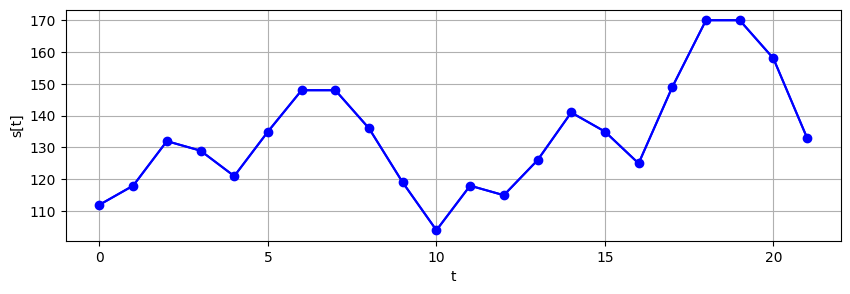

In [ ]:
#@title Univariate time series
values = [
    112,
    118,
    132,
    129,
    121,
    135,
    148,
    148,
    136,
    119,
    104,
    118,
    115,
    126,
    141,
    135,
    125,
    149,
    170,
    170,
    158,
    133
]

plot_xlim = [-1, len(values)]

plt.figure(figsize=(10, 3))
plt.plot(values, color="blue")
plt.plot(values, marker="o", color="blue")
plt.xlabel("t")
plt.ylabel("s[t]")
plt.xlim(plot_xlim)
plt.grid()
plt.show()

Often, multiple different values are sampled in time. For instance, a weather station might collect the temperature, humidity and pressure every hour. This is called a **multivariate time series**.

Sampling data at a uniform rate can be limiting. For instance, if a store is closed on sunday, it might not be interesting to store the daily sales on each day including sundays. Instead, sundays might be skipped from the records, making the observations not uniformly sampled.

Going further, when studying event logs such as records of visits on a website, an observation (i.e., a visit) can happen at anytime: there is not guarantee that visits are evenly spaced. This type of data is called a **time sequence** (instead of time-series) and each record is called an **event**.

Note that in a time sequence, multiple events can happen at the same time.

The type of data attached to each event is not limited to numerical values. An event can also have categorical, free text or even images attached.

In many real world situations, the raw data is represented as as time sequences (e.g. an SQL database of events). This sequence is then aggregated into a simpler data representation in order to facilitate analysis and forecasting. For instance, individual client transactions in a shop might be aggregated into daily number of sales, or monthly revenue.

Going up the road of complexity, we meet **relational temporal data**, which expresses relationships between objects where time is a factor. An example is relationships between bank clients (e.g., married). These temporal relationships can sometime be represented using event sequences to mark the start and updates of each connection.

## Forecasting

Now that we know what is our data, let's talk about forecasting. The simplest type of forecasting is time-series forecasting where the objective is to predict the next values from past ones.



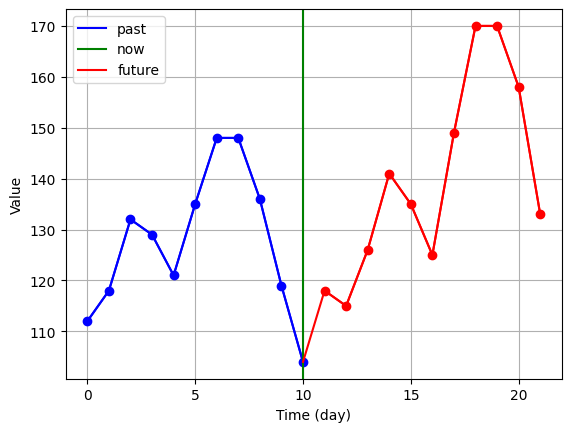

In [ ]:
#@title Forecast
past_data = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104]
past_time = [i for i in range(len(past_data))]
now_time = len(past_time) - 1
future_data = [118, 115, 126, 141, 135, 125, 149, 170, 170, 158, 133]
future_time = [i + len(past_time) for i in range(len(future_data))]

plot_xlim = [-1, future_time[-1] + 1]


plt.plot(past_time, past_data, color="blue", label="past")
plt.plot(past_time, past_data, color="blue", marker="o")
plt.axvline(x=now_time, color="green", label="now")
plt.plot(future_time, future_data, color="red", marker="o")
# add last past value in order to join future and past line
plt.plot([past_time[-1]] + future_time, [past_data[-1]] + future_data, color="red", label="future")


plt.xlabel("Time (day)")
plt.ylabel("Value")
plt.xlim(plot_xlim)
plt.legend()
plt.grid()
plt.show()

### Question

Is the data attached to time `t` necessarily representative of something that happened at time `t`?

If not: can you find a counter example?


### Solution

The time $t$ of an observation is not necessarily the time of occurrence of the phenomenon. Instead, it can also be the time where this observation becomes available for decision making (**when** and **where**). For example, if the [Curiosity mars rover](https://en.wikipedia.org/wiki/Curiosity_(rover)) makes a measurement at a certain time t, this measurement can only be used for decision making on earth between t+5 and t+20 minutes later because of the speed of light propagation.

### Next step forecast

The simplest and most direct type of forecasting is the "next step" prediction. The objective is to predict the next value $s[t+1]$ (orange dot).

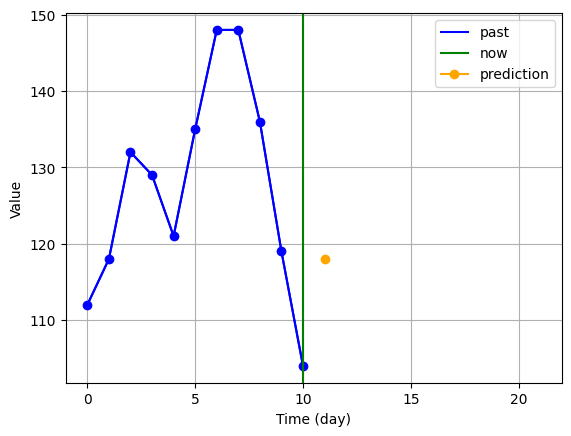

In [ ]:
#@title
plt.plot(past_time, past_data, color="blue", label="past")
plt.plot(past_time, past_data, color="blue", marker="o")
plt.axvline(x=now_time, color="green", label="now")
plt.plot(future_time[0], future_data[0], color="orange", marker="o", label="prediction")

plt.xlabel("Time (day)")
plt.ylabel("Value")
plt.xlim(plot_xlim)
plt.legend()
plt.grid()
plt.show()

The prediction can be a single point such as the expected value, a distribution, or a statistic of this distribution (e.g. first quantile). It is common to predict both the expected value and the confidence boundaries on the prediction.

**Example of next-step forecast:** How many units will be sold tomorrow?

### Multi-step forecasts

More complex is the forecasting of the next $h>1$ steps: $\{ s[t+i]\ |\ i \in [1, h] \}$

*Note: $h$ stands for "horizon".*

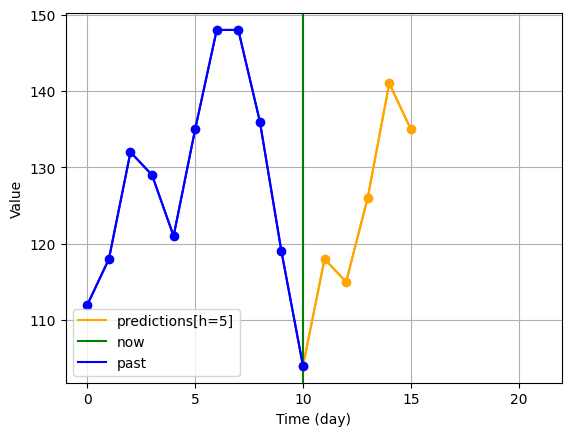

In [ ]:
#@title
#adding last past data point to draw line between past data and prediction
predictions = [past_data[-1]] + future_data[:5]
predictions_time = [past_time[-1]] + future_time[:5]

plt.plot(predictions_time, predictions, color="orange", label="predictions[h=5]")
plt.plot(predictions_time, predictions, color="orange", marker="o")
plt.axvline(x=now_time, color="green", label="now")
plt.plot(past_time, past_data, color="blue", label="past")
plt.plot(past_time, past_data, color="blue", marker="o")

plt.xlabel("Time (day)")
plt.ylabel("Value")
plt.xlim(plot_xlim)
plt.legend()
plt.grid()
plt.show()

### Question

Can you use a next step forecast model to compute multi-step forecasts?

#### Solution

Yes. You can apply a next step forecast model at time t to generate the prediction for t+1, and then treat this prediction as an observation. The next step forecast model can then be applied at time t+1 to predict t+2 using the t+1 prediction. This kind of model is called *auto-regressive* or *recursive*.

#### End of solution

### Aggregated forecast

In some cases, predicting the aggregated values of the next steps is easier and equally useful for planning.

For example, we can predict the sum or the maximum of the TS in the next h days:
$$
\sum_{i=1}^h s[t+i]
$$
or
$$
\max_{i \in [1, h]} s[t+i]
$$

**Concrete example:** predict the sum of sales in the next 28 days.

Aggregated forecasts can also be applied on time sequences. For example, predicting the count and number of sales in the next 28 days.

Some type of forecasts are only available on time sequences. For example, predicting the time until the next sale.





### Conditional forecast

Finally, it is sometimes enough to only predict a condition on the data. For example, we can predict if the value will be greater than a threshold $\tau$ in the next $h$ steps: $\ s[t+i] \ge \tau$ for $i \in [1,h]\ $.

**Concrete example:** Will the heart rate of the patient go under 5 beats per seconds in the next 6h.


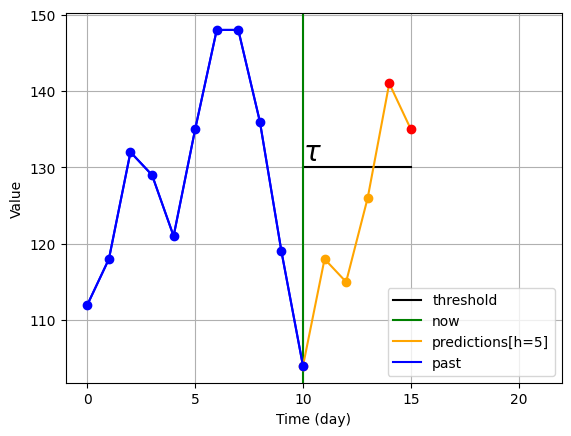

In [ ]:
#@title
tau = 130

plt.text(
    predictions_time[0],
    tau + 1,
    r"$\tau$",
    fontsize=20,
    color="black",
)

# draw horizontal line in tau in predictions time
plt.plot(
    predictions_time,
    [tau] * len(predictions_time),
    color="black",
    label="threshold",
)

plt.axvline(x=now_time, color="green", label="now")

# highlight predictions above tau

plt.plot(predictions_time, predictions, color="orange", label="predictions[h=5]")
for i in range(len(predictions)):
    if predictions[i] > tau:
        plt.plot(
            predictions_time[i],
            predictions[i],
            color="red",
            marker="o",
        )
    else:
        plt.plot(
            predictions_time[i],
            predictions[i],
            color="orange",
            marker="o",
        )

plt.plot(past_time, past_data, color="blue", label="past")
plt.plot(past_time, past_data, color="blue", marker="o")

plt.xlabel("Time (day)")
plt.ylabel("Value")
plt.xlim(plot_xlim)
plt.legend()
plt.grid()
plt.show()

Conditional forecast can also be applied on time-sequences. For example, predicting if an event will happen in the next 28 days.

### Question

Can you use a mult-istep forecaster to generate aggregated or conditional predictions?

If so, what might be the issue?

### Solution

The prediction of aggregated and condition forecasting can be computed from multi-step forecasting predictions.
However predicting the individual step values might be more complex than predicting the aggregated or conditional forecast directly.
Therefore, forecasting aggregate/conditional forecasting directly can be more efficient / faster / produce better results.


## Next notebook

Once you are done reading, go to the next notebook.